<a target="_blank" href="https://colab.research.google.com/github/Andrew-mcArty/RL_AAPGAB/blob/main/primer_agente.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!curl -O https://raw.githubusercontent.com/Andrew-mcArty/RL_AAPGAB/refs/heads/main/src/FrozenAgent.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 31428  100 31428    0     0    99k      0 --:--:-- --:--:-- --:--:--  101k


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from __future__ import annotations
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
import FrozenAgent
import random
import time

semilla=100

Cargamos el entorno

In [46]:


print("definimos el entorno:")
name = 'FrozenLake-v1'
env4 = gym.make(name, is_slippery=False, map_name="4x4", render_mode="rgb_array") # No resbaladizo para entender mejor los resultados.
env8 = gym.make(name, is_slippery=False, map_name="8x8", render_mode="rgb_array") # No resbaladizo para entender mejor los resultados.


definimos el entorno:


Función útil para establecer la semilla tanto en numpy como en la librería random

In [47]:

def setSemilla(semilla):
    random.seed(semilla)
    np.random.seed(semilla)


Algorimto genérico de para evaluar un agente

In [48]:

def train_agent(agent, env, num_episodes=5000, decay=False, semilla=1):
    #inicializamos el agente
    agent.initAgent()
    for episode in tqdm(range(num_episodes)):
        state, info = env.reset(seed=semilla)
        done = False
    
        #inicializo el episodio
        agent.initEpisode()
    
        # play one episode
        while not done:
            if decay:
                agent.decay_epsilon()
            action = agent.get_action(env, state)
            
            next_state, reward, terminated, truncated, info = env.step(action)

            # update the agent
            agent.updateStep(state, action, reward, terminated, next_state)
            
            # update if the environment is done and the current state
            done = terminated or truncated
            state = next_state
            
        #después de acabar el episodio actualizo la Q y el epsilon
        agent.updateEpisode()


Muestra los resultados recogidos por el agente durante su entrenamiento. Esta función muestra dos indicadores que implementan todos los agentes: 
* proporción de recompensas: suma recompensas / episodios
* proporción de tamaño de episodios: suma len(episodio) / episodios

In [49]:


def plot(agent1,num):
  # Creamos una lista de índices para el eje x
  indices1 = list(range(len(agent1.list_stats)))
    
  # Crear figura con dos subgráficos
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

  # Primer subplot
  ax1.plot(indices1[:num], agent1.list_stats[:num], label=agent1)
  ax1.set_title('Proporción de recompensas')
  ax1.set_xlabel('Episodio')
  ax1.set_ylabel('Proporción')
  ax1.legend()
  ax1.grid(True)

  # Segundo subplot
  ax2.plot(indices1[:num], agent1.list_episodes[:num], label=agent1)
  ax2.set_title('Tamaño de episodios')
  ax2.set_xlabel('Episodio')
  ax2.set_ylabel('Tamaño')
  ax2.legend()
  ax2.grid(True)

  # Primer subplot
  ax3.plot(indices1, agent1.list_stats, label=agent1)
  ax3.set_title('Proporción de recompensas')
  ax3.set_xlabel('Episodio')
  ax3.set_ylabel('Proporción')
  ax3.legend()
  ax3.grid(True)

  # Segundo subplot
  ax4.plot(indices1, agent1.list_episodes, label=agent1)
  ax4.set_title('Tamaño de episodios')
  ax4.set_xlabel('Episodio')
  ax4.set_ylabel('Tamaño')
  ax4.legend()
  ax4.grid(True)

  # Ajustar diseño y mostrar gráfico
  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show() 



Definimos dos agentes: MC on policy all visits y first visit.

Ejecutamos en entrenameiento y obtenemos la mejor política de cada uno

In [50]:

#inicializo los numeros aleatorios
setSemilla(semilla)

# hyperparameters
n_episodes = 15000
start_epsilon = 0.4
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentGreedy(
    env=env4,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
train_agent(agent1, env4, num_episodes=n_episodes, decay=False, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env4, agent1.Q)


100%|██████████| 15000/15000 [00:05<00:00, 2500.00it/s]


Mostramos resultados

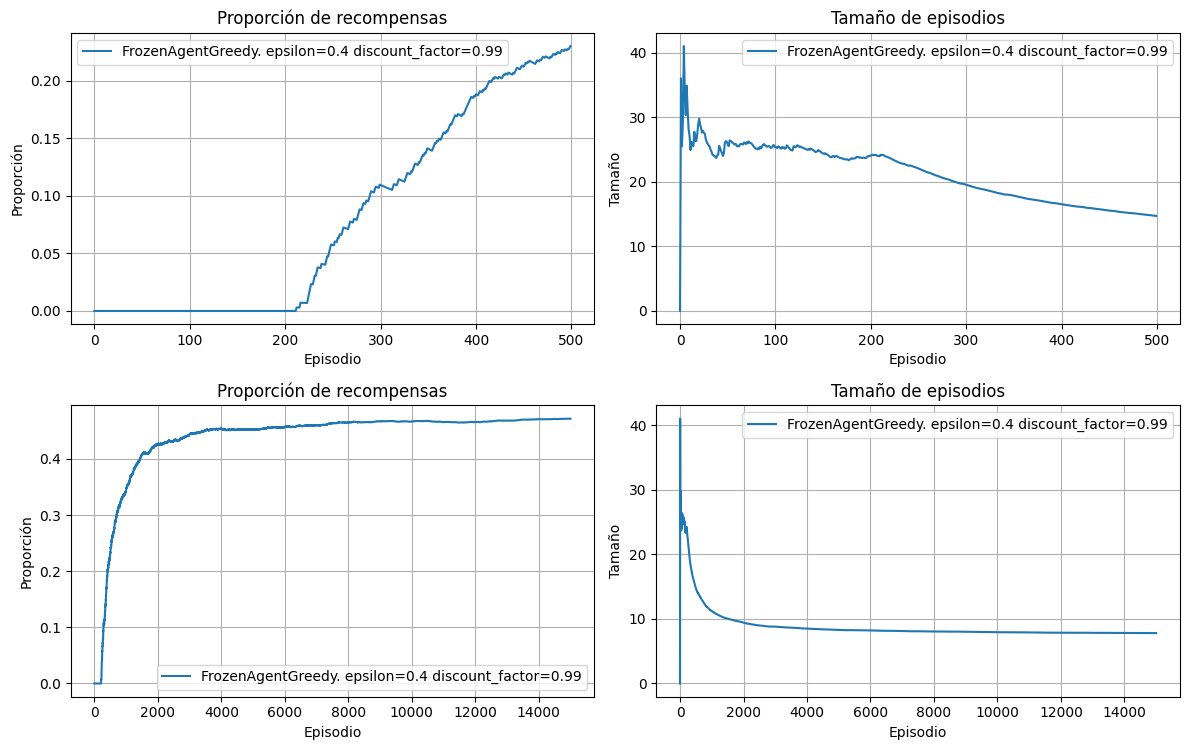

In [51]:
plot(agent1,500)


================== AGENTE 1 FrozenAgentGreedy. epsilon=0.4 discount_factor=0.99
Máxima proporcion: 0.47156826079865855
Valores Q para cada estado:
 [[0.24721324 0.35271132 0.47688191 0.41980807]
 [0.41122204 0.         0.55166864 0.46684679]
 [0.45533755 0.57428558 0.47559705 0.53367966]
 [0.54277968 0.         0.50182075 0.48910226]
 [0.09465489 0.26829479 0.         0.43399321]
 [0.         0.         0.         0.        ]
 [0.         0.7381739  0.         0.53855354]
 [0.         0.         0.         0.        ]
 [0.06419304 0.         0.33248648 0.34167626]
 [0.32162357 0.71881757 0.73359952 0.        ]
 [0.62902847 0.87714764 0.         0.57319104]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.690915   0.85138971 0.58480173]
 [0.71822433 0.86020268 0.92163178 0.7090192 ]
 [0.         0.         0.         0.        ]]
Política óptima obtenida
 [[0. 0. 2. 0.]
 [0. 0. 2. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

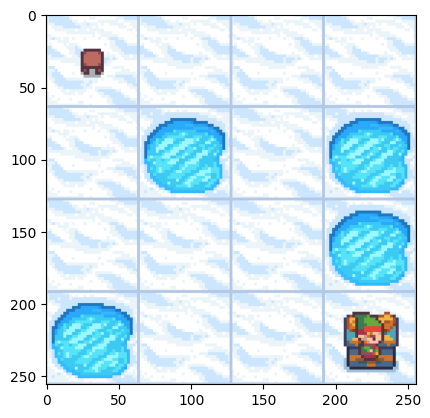

In [52]:
print(f"================== AGENTE 1 {agent1}")
print(f"Máxima proporcion: {agent1.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent1.Q)
print("Política óptima obtenida\n", pi1, f"\n Acciones {actions1} \n Para el siguiente grid\n" )
print()
plt.imshow(env4.render())

Ahora se prueba con el entorno de 8x8

In [55]:

#inicializo los numeros aleatorios
setSemilla(semilla)

# hyperparameters
n_episodes = 15000
start_epsilon = 0.4
discount_factor = 0.99

agent1 = FrozenAgent.FrozenAgentGreedy(
    env=env8,
    epsilon=start_epsilon,
    discount_factor=discount_factor,
)
train_agent(agent1, env8, num_episodes=n_episodes, decay=True, semilla=semilla)

pi1, actions1 = agent1.pi_star_from_Q(env8, agent1.Q)

100%|██████████| 15000/15000 [00:27<00:00, 542.36it/s]


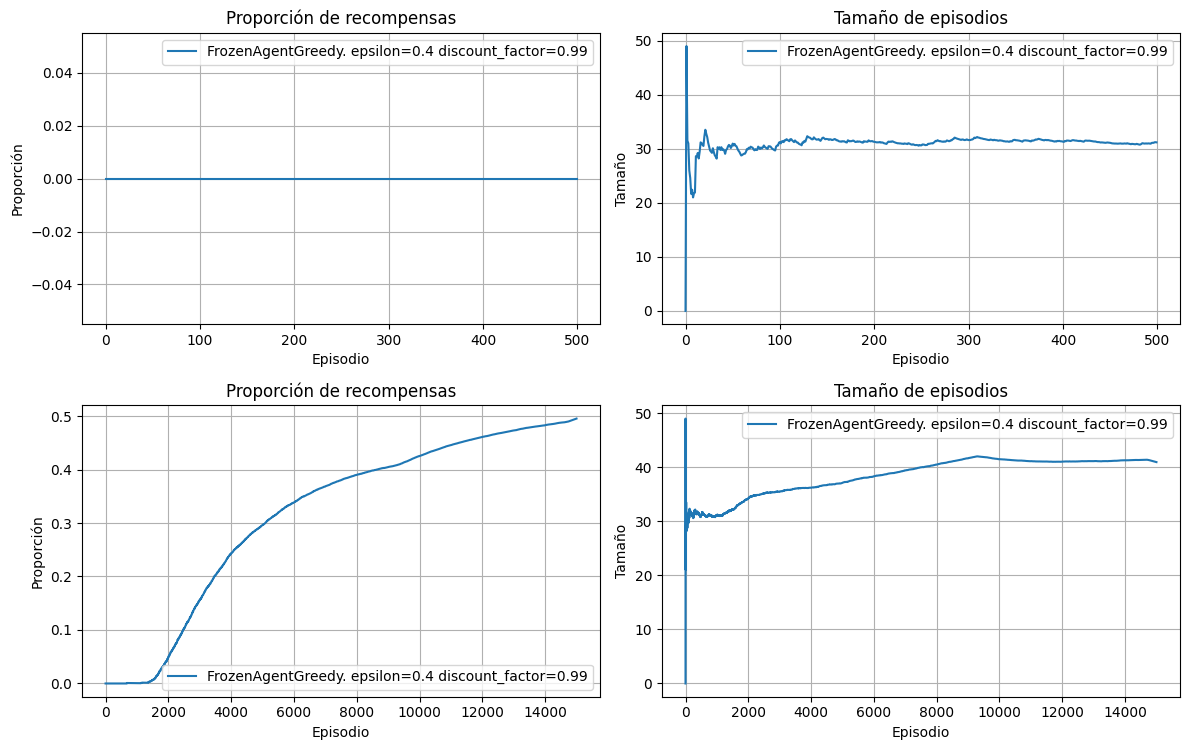

In [56]:
plot(agent1,500)

================== AGENTE 1 FrozenAgentGreedy. epsilon=0.4 discount_factor=0.99
Máxima proporcion: 0.4952237163067618
Valores Q para cada estado:
 [[0.32199598 0.44324904 0.3890049  0.43334622]
 [0.24100192 0.45668839 0.26106942 0.32985713]
 [0.29289284 0.14274892 0.1465188  0.0939815 ]
 [0.23629785 0.29057211 0.57860344 0.31855483]
 [0.36630407 0.3619326  0.58732844 0.37335738]
 [0.39046487 0.58589158 0.40034092 0.39283874]
 [0.45147868 0.17064106 0.18051707 0.17888891]
 [0.1301531  0.46471226 0.23781167 0.1666052 ]
 [0.13514233 0.11099041 0.48044597 0.10868453]
 [0.20707112 0.21209939 0.51990396 0.19809136]
 [0.27040233 0.24318037 0.53739543 0.22684862]
 [0.33472561 0.         0.36728627 0.57418027]
 [0.16435175 0.16363847 0.47436677 0.21783815]
 [0.40106424 0.38172442 0.5902735  0.40287553]
 [0.42691403 0.4287078  0.59823975 0.40774361]
 [0.45821639 0.60007586 0.46578348 0.47071415]
 [0.24833166 0.04376804 0.10681091 0.11122078]
 [0.03881951 0.02064101 0.043701   0.28785263]
 [0.053

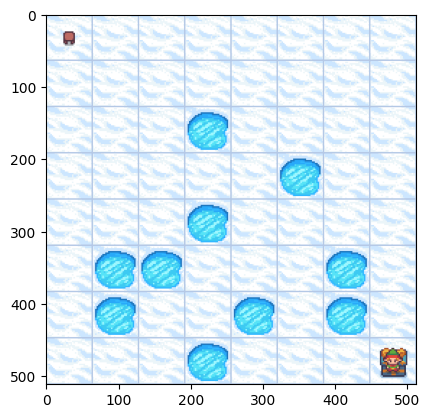

In [57]:
print(f"================== AGENTE 1 {agent1}")
print(f"Máxima proporcion: {agent1.list_stats[-1]}")
print("Valores Q para cada estado:\n", agent1.Q)
print("Política óptima obtenida\n", pi1, f"\n Acciones {actions1} \n Para el siguiente grid\n")
print()
plt.imshow(env8.render())